In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import optical_cond
import my_my_maxent as maxent
import sys

# sys.path.append('/oak/stanford/orgs/simes/rebjin/dqmc-dev/util')
sys.path.append('/Users/rebekahjin/Documents/Devereaux Group/dqmc-dev/util')
import util

import importlib
import os
import pandas as pd

import scienceplots
plt.style.use(['science','no-latex'])
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg") 

default_figsize = plt.rcParams['figure.figsize']
print("Default figsize:", default_figsize)
plt.rcParams['lines.markersize'] = 1

Default figsize: [3.5, 2.625]


/var/folders/9h/hnm6v9vj2s7c2q01hnv03k1m0000gn/T/ipykernel_6183/1020029512.py:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("svg")


In [20]:
### Standardize filepaths for U
U = 6
# parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'
parent_dir = '/Users/rebekahjin/Documents/Devereaux Group/nflux1_n0.9'

row_list = []
for subdir, dirs, files in os.walk(parent_dir):
    if f'U{U}' in subdir and '/.ipynb_checkpoints' not in subdir:
        # Get path
        path = subdir+'/'
        
        # Get params
        Ny, Nx, beta, L, tp = util.load_firstfile(
            path, "metadata/Nx", "metadata/Ny", "metadata/beta", "params/L", "metadata/t'"
        )

        # Add to dict for df
        dict = {
            'path': path,
            'U': U,
            'beta': np.round(beta, 6), 
            'Ny': Ny,
            'Nx': Nx,
            'L': L,
            'tp': tp
        }
        row_list.append(dict)
        
params_df = pd.DataFrame(row_list)
params_df = params_df.sort_values(by=['beta'], ascending = False)
params_df = params_df.reset_index(drop=True)
pd.set_option('display.width', 2000)
print(params_df)

### Look through repeats (ok this was just a mistake of copying lol no more repeats)

                                                path  U   beta Ny Nx   L tp
0  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  3.000  8  8  30  0
1  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  2.000  8  8  20  0
2  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  1.500  8  8  15  0
3  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  1.250  8  8  20  0
4  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  1.000  8  8  10  0
5  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.700  8  8  10  0
6  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.500  8  8  10  0
7  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.250  8  8  10  0
8  /Users/rebekahjin/Documents/Devereaux Group/nf...  6  0.125  8  8  10  0


/Users/rebekahjin/Documents/Devereaux Group/nflux1_n0.9/beta1_U6_mu-1.135/
MaxEnt for sigma_xx


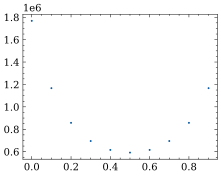

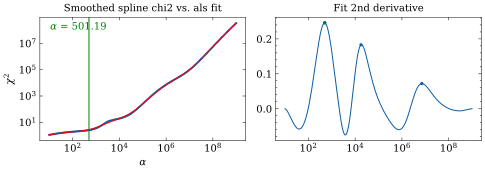

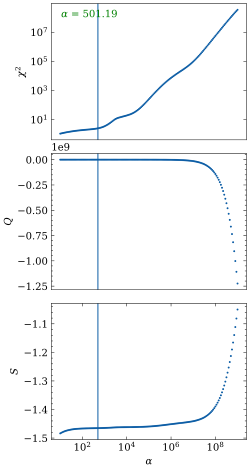

Alpha:  5.01e+02
MaxEnt for sigmas_sum


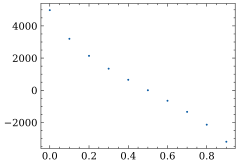

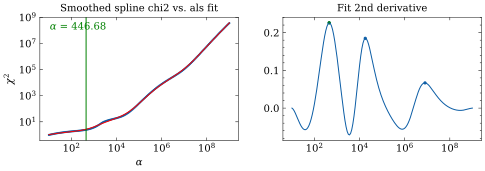

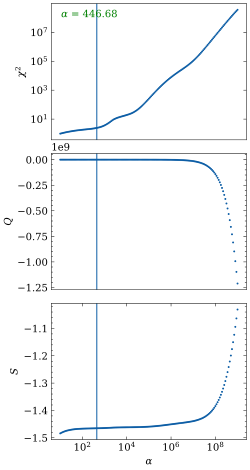

Alpha:  4.47e+02


(array([1.51388781e-05, 9.36530019e-06, 5.86900390e-06, 3.75306059e-06,
        2.46696986e-06, 1.67884815e-06, 1.19094289e-06, 8.86203670e-07,
        6.95603013e-07, 5.78653083e-07, 5.12047088e-07, 4.83235164e-07,
        4.87047737e-07, 5.24356260e-07, 6.02382820e-07, 7.36798289e-07,
        9.56347309e-07, 1.31160655e-06, 1.89090155e-06, 2.84879586e-06,
        4.45652333e-06, 7.19002242e-06, 1.18805799e-05, 1.99656542e-05,
        3.38916916e-05, 5.77317385e-05, 9.80782337e-05, 1.65239724e-04,
        2.74691437e-04, 4.48593473e-04, 7.17010210e-04, 1.11829196e-03,
        1.69800489e-03, 2.50591801e-03, 3.59093273e-03, 4.99442285e-03,
        6.74307260e-03, 8.84271325e-03, 1.12746593e-02, 1.39955717e-02,
        1.69410638e-02, 2.00323819e-02, 2.31848336e-02, 2.63163833e-02,
        2.93550020e-02, 3.22438336e-02, 3.49438237e-02, 3.74339766e-02,
        3.97097543e-02, 4.17802826e-02, 4.36650101e-02, 4.53903436e-02,
        4.69866171e-02, 4.84855864e-02, 4.99185154e-02, 5.131482

In [54]:
##### Test for one value beta (symmetrized MaxEnt, modified Bryan's)
importlib.reload(maxent)
importlib.reload(optical_cond)

# Get path (from cleaned up params_df)
beta = 1
path = params_df[params_df['beta']== beta]['path'].item()
print(path)

### Define ws
num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))

### Get sigmas
optical_cond.get_sigmas(path, ws, dws, get_xy=True, bs=0, mdl=None, opt_method='Bryan', plot_chi_xy=False)

/Users/rebekahjin/Documents/Devereaux Group/nflux1_n0.9/beta3_U6_mu-1.275/


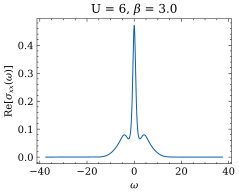

In [120]:
### Example using restructured code
importlib.reload(maxent)
importlib.reload(optical_cond)

# Get path (from cleaned up params_df)
beta = 3
path = params_df[params_df['beta']== beta]['path'].item()
print(path)

### Define ws
num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)

### Get sigmas
sig = optical_cond.sigma(path, 'xy', ws, dws, bs=0)
sig.plot_sigma('re_sig_xx')

# cc = optical_cond.cond_calculator(path, ws, dws)
# cc.calc_sigma_xx(settings_xx={'opt_method': 'Bryan'}, bs=0)

# cc.plot_sigma('re_sig_xx')
# cc.plot_sigma('im_sig_xy')
# cc.plot_sigma('re_sig_xy')

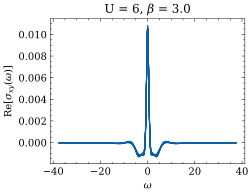

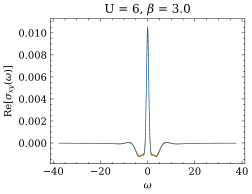

In [86]:
cc.plot_sigma('re_sig_xy', plot_bs=True, bs_mode='asd')
cc.plot_sigma('re_sig_xy', plot_bs=True)

nbin=100	<sign>=(0.8021223963281076-1.5288014202917204e-06j)
alpha=39810717.055	chi2/dof=13391121.920	A.sum()=0.802521


/Users/rebekahjin/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


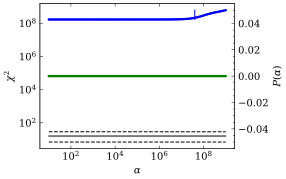

[0.00126135 0.00134917 0.00143642 0.00152186 0.00160415 0.00168182
 0.00175336 0.00181723 0.00187194 0.00191613 0.00194863 0.0019685
 0.00197516 0.00196833 0.00194817 0.00191517 0.00187021 0.00181449
 0.00174944 0.0016767  0.00159801 0.00151513 0.00142976 0.00134351
 0.00125782 0.00117394 0.00109289 0.00101552 0.00094241 0.00087399
 0.00081051 0.00075208 0.00069867 0.00065018 0.00060644 0.00056723
 0.00053229 0.00050136 0.00047419 0.0004505  0.00043006 0.00041264
 0.00039804 0.00038609 0.00037662 0.00036952 0.00036468 0.00036202
 0.0003615  0.00036308 0.00036677 0.00037257 0.00038054 0.00039073
 0.00040324 0.00041816 0.00043563 0.00045579 0.00047881 0.00050488
 0.0005342  0.00056699 0.00060348 0.00064393 0.00068859 0.00073772
 0.00079161 0.00085051 0.00091471 0.00098445 0.00105997 0.00114151
 0.00122925 0.00132335 0.00142393 0.00153107 0.00164477 0.00176498
 0.00189158 0.00202438 0.00216309 0.00230736 0.00245673 0.00261067
 0.00276856 0.00292968 0.00309327 0.00325848 0.00342439 0.00359

/Users/rebekahjin/Library/Python/3.9/lib/python/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


KeyError: 'sigma_name'

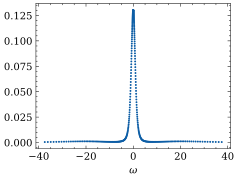

In [117]:
import maxent as e_maxent
importlib.reload(e_maxent)

def get_sigma_w(path, mdl, w, dw, bs=0):
    Ny, Nx, beta, L, tp = util.load_firstfile(
        path, "metadata/Nx", "metadata/Ny", "metadata/beta", "params/L", "metadata/t'"
    )
    taus = np.linspace(0, beta, L + 1)

    n_sample, sign, jj = util.load(
        path, "meas_uneqlt/n_sample", "meas_uneqlt/sign", "meas_uneqlt/jj"
    )
    mask = n_sample == n_sample.max()
    sign, jj = sign[mask], jj[mask]
    nbin = mask.sum()

    jj.shape = -1, L, 4, 4, Ny, Nx
    jjq0 = jj.sum((-1, -2))
    jxjxq0 = -(
        jjq0[..., 0, 0]
        + tp * jjq0[..., 0, 2]
        - tp * jjq0[..., 0, 3]
        + tp * jjq0[..., 2, 0]
        + tp * tp * jjq0[..., 2, 2]
        - tp * jjq0[..., 3, 0]
        + tp * tp * jjq0[..., 3, 3]
    )
    jyjyq0 = -(
        jjq0[..., 1, 1]
        + tp * jjq0[..., 1, 2]
        + tp * jjq0[..., 1, 3]
        + tp * jjq0[..., 2, 1]
        + tp * tp * jjq0[..., 2, 2]
        + tp * jjq0[..., 3, 1]
        + tp * tp * jjq0[..., 3, 3]
    )
    chiq0 = 0.5 * (jxjxq0 + jyjyq0)
    chiq0 = 0.5 * (chiq0 + chiq0[:, -np.arange(L) % L])
    chiq0 = np.real(chiq0)
    # maxent
    chiq0 /= n_sample.max()
    sign /= n_sample.max()
    print(f"nbin={nbin}\t<sign>={sign.mean()}")

    krnl = e_maxent.kernel_b(beta, taus[0 : L // 2 + 1], w, sym=True)
    if mdl is None:
        mdl = e_maxent.model_flat(dw)
        useBT = True
    else:
        useBT = False

    if bs > 0:
        As = np.zeros((bs, len(w)))
        mdls = np.zeros((bs, len(w)))
        if mdl.shape == w.shape:
            mdl = np.broadcast_to(mdl, (bs, len(w)))
        for i in range(bs):
            resample = np.random.randint(0, nbin, nbin)
            f = chiq0[resample].mean(0)
            chiq0w0 = scipy.interpolate.CubicSpline(taus, np.append(f, f[0])).integrate(0, beta)
            g = 2 * chiq0[resample, : L // 2 + 1] / chiq0w0
            #             print(i)
            #             global gg, kk, mm
            #             gg, kk, mm = g, krnl, mdl
            A = e_maxent.calc_A(
                g, krnl, mdl[i] + np.nextafter(0, 1), plot=False, useBT=useBT
            )
            mdls[i] = A / A.sum()
            As[i] = A / dw * (chiq0w0 / sign[resample].mean()) * np.pi / 2
        return As, mdls
    else:
        f = chiq0.mean(0)
        chiq0w0 = scipy.interpolate.CubicSpline(taus, np.append(f, f[0])).integrate(0, beta)
        g = 2 * chiq0[:, : L // 2 + 1] / chiq0w0

        A = e_maxent.calc_A(g, krnl, mdl, plot=True, useBT=useBT)
        print(A)
        return A / dw * (chiq0w0 / sign.mean()) * np.pi / 2, A / A.sum()
    
def plot_sigmas(ws, sigmas_w, U, beta, sigma_name, yerr=None, label='', ylim=None, xlim=None):
    # (for ylabel)
    sigma_name_dict = {
        "re_sigmas_xx": r'Re[$\sigma_{xx}(\omega)$]', 
        "im_sigmas_xx": r'Im[$\sigma_{xx}(\omega)$]',
        "re_sigmas_xy": r'Re[$\sigma_{xy}(\omega)$]',
        "im_sigmas_xy": r'Im[$\sigma_{xy}(\omega)$]',
        "sigmas_sum": r'Re[$\sigma_{xx}(\omega)$] + Im[$\sigma_{xy}(\omega)$]'
    }
    
    fig, ax = plt.subplots()
    # plt.errorbar(ws, re_sigmas_xx, yerr=re_sigmas_xx_err)
    if np.any(yerr):
        ax.errorbar(ws, sigmas_w, yerr=yerr, fmt='s-', lw=0.7, ms=0, label=label, capsize=0, ecolor='orange', elinewidth=0.5)
    else:
        ax.scatter(ws, sigmas_w, s=1, label=label)
    plt.xlabel(r'$\omega$')
    plt.ylabel(sigma_name_dict[sigma_name])
    plt.title(rf'{sigma_name_dict[sigma_name]}: U = {U}, $\beta$ = {beta}')
    if np.any(ylim):
        plt.ylim(*ylim)
    if np.any(xlim):
        plt.xlim(*xlim)
    if label:
        plt.legend()

num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)

xx, _ = get_sigma_w(path, None, ws, dws, bs=0)
plot_sigmas(ws, xx, U, beta, "sigma_name", yerr=None, label='', ylim=None, xlim=None)

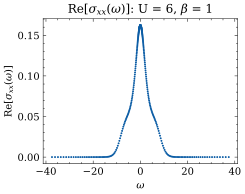

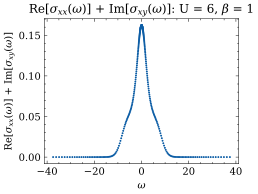

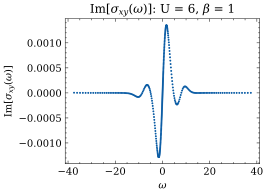

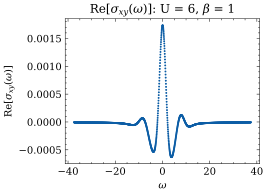

In [43]:
### Plot results
importlib.reload(optical_cond)
importlib.reload(maxent)

xs = np.linspace(-w_lim, w_lim, 1500)
optical_cond.plot_sigmas(ws, re_sigmas_xx, U, beta, "re_sigmas_xx", yerr = None)
optical_cond.plot_sigmas(ws, sigmas_sum, U, beta, "sigmas_sum", yerr = None)
optical_cond.plot_sigmas(ws, im_sigmas_xy, U, beta, "im_sigmas_xy", yerr = None)
optical_cond.plot_sigmas(xs, re_sigmas_xy, U, beta, "re_sigmas_xy", yerr = None)

In [159]:
# Try bootstrapping
importlib.reload(maxent)
importlib.reload(optical_cond)

# Get path (from cleaned up params_df)
parent_dir = '/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/'
beta = 3
path = params_df[params_df['beta']== beta]['path'].item()
print(path)

### Define ws
num_w = 300
ws, dws = maxent.gen_grid(num_w, -2.1, 2.1, lambda x: 0.4 * np.sinh(2.5 * x))
w_lim = np.max(ws)

re_sigmas_xx_bs, re_sigmas_xy_bs, im_sigmas_xy_bs = optical_cond.get_sigmas(
    path, ws, dws,
    get_xy=True,
    bs=20,
    opt_method=['Bryan', 'Bryan']
)

/oak/stanford/orgs/simes/rebjin/nflux1_n0.9/beta3_U6_mu-1.275/
MaxEnt for sigma_xx
MaxEnt for sigmas_sum
Bs 0 ------------
Alpha:  3.55e+03
Alpha:  4.47e+03
Bs 1 ------------
Alpha:  6.31e+03
Alpha:  3.98e+03
Bs 2 ------------
Alpha:  2.51e+03
Alpha:  3.16e+03
Bs 3 ------------
Alpha:  2.51e+02
Alpha:  4.47e+02
Bs 4 ------------
Alpha:  3.16e+03
Alpha:  5.01e+03
Bs 5 ------------
Alpha:  2.24e+03
Alpha:  1.78e+03
Bs 6 ------------
Alpha:  4.47e+03
Alpha:  1.78e+03
Bs 7 ------------
Alpha:  2.82e+03
Alpha:  4.47e+03
Bs 8 ------------
Alpha:  3.55e+03
Alpha:  3.16e+03
Bs 9 ------------
Alpha:  5.01e+03
Alpha:  3.98e+03
Bs 10 ------------
Alpha:  3.55e+03
Alpha:  3.98e+03
Bs 11 ------------
Alpha:  2.00e+03
Alpha:  2.51e+03
Bs 12 ------------
Alpha:  2.82e+03
Alpha:  5.62e+03
Bs 13 ------------
Alpha:  2.51e+03
Alpha:  1.78e+03
Bs 14 ------------
Alpha:  2.51e+03
Alpha:  2.00e+03
Bs 15 ------------
Alpha:  3.98e+03
Alpha:  3.55e+03
Bs 16 ------------
Alpha:  2.82e+03
Alpha:  1.12e+03
Bs 1

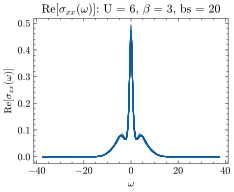

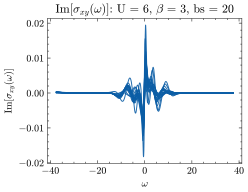

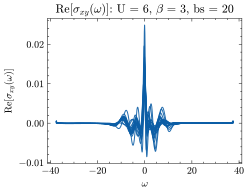

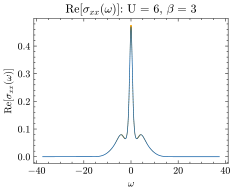

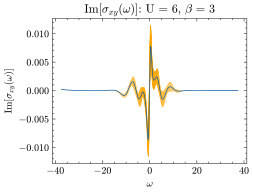

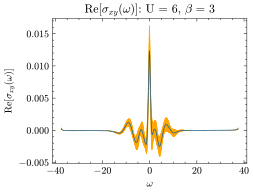

In [160]:
# Plot bootstrapped results
importlib.reload(optical_cond)
importlib.reload(maxent)

xs = np.linspace(-w_lim, w_lim, 1500)
optical_cond.plot_sigmas_bs(ws, re_sigmas_xx_bs, U, beta, "re_sigmas_xx", yerr = None)
optical_cond.plot_sigmas_bs(ws, im_sigmas_xy_bs, U, beta, "im_sigmas_xy", yerr = None)
optical_cond.plot_sigmas_bs(xs, re_sigmas_xy_bs, U, beta, "re_sigmas_xy", yerr = None)

# Plot bootstrap averages too I guess lmfao
xs = np.linspace(-w_lim, w_lim, 1500)
optical_cond.plot_sigmas(ws, np.mean(re_sigmas_xx_bs, axis=0), U, beta, "re_sigmas_xx", yerr = np.std(re_sigmas_xx_bs, axis=0))
optical_cond.plot_sigmas(ws, np.mean(im_sigmas_xy_bs, axis=0), U, beta, "im_sigmas_xy", yerr = np.std(im_sigmas_xy_bs, axis=0))
optical_cond.plot_sigmas(xs, np.mean(re_sigmas_xy_bs, axis=0), U, beta, "re_sigmas_xy", yerr = np.std(re_sigmas_xy_bs, axis=0))